In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Inserting the Dataset

In [3]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))

In [4]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Data Inspection

In [5]:
housing.shape

(545, 13)

In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [7]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

# Data Preparation

In [8]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [9]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Dummies Variables

In [10]:
status = pd.get_dummies(housing['furnishingstatus'])

In [11]:
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [12]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [13]:
housing = pd.concat([housing, status], axis = 1)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [15]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


# Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
166,0.309091,0.440860,0.4,0.0,0.000000,1,0,1,0,1,0.666667,1,False,True
378,0.163636,0.044803,0.4,0.0,0.666667,1,0,0,1,1,0.000000,1,True,False
349,0.175758,0.227240,0.4,0.0,0.333333,1,0,0,0,0,0.000000,0,True,False
368,0.166667,0.286022,0.2,0.0,0.000000,0,0,0,0,0,0.000000,0,True,False
306,0.209091,0.228674,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,True,False


In [21]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.259063,0.247409,0.393701,0.140420,0.275591,0.853018,0.183727,0.372703,0.041995,0.325459,0.224847,0.230971
std,0.160119,0.149845,0.143498,0.244613,0.297439,0.354553,0.387771,0.484160,0.200841,0.469162,0.282865,0.422008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134050,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.211470,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.348485,0.337634,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Showing Corelation Heatmap

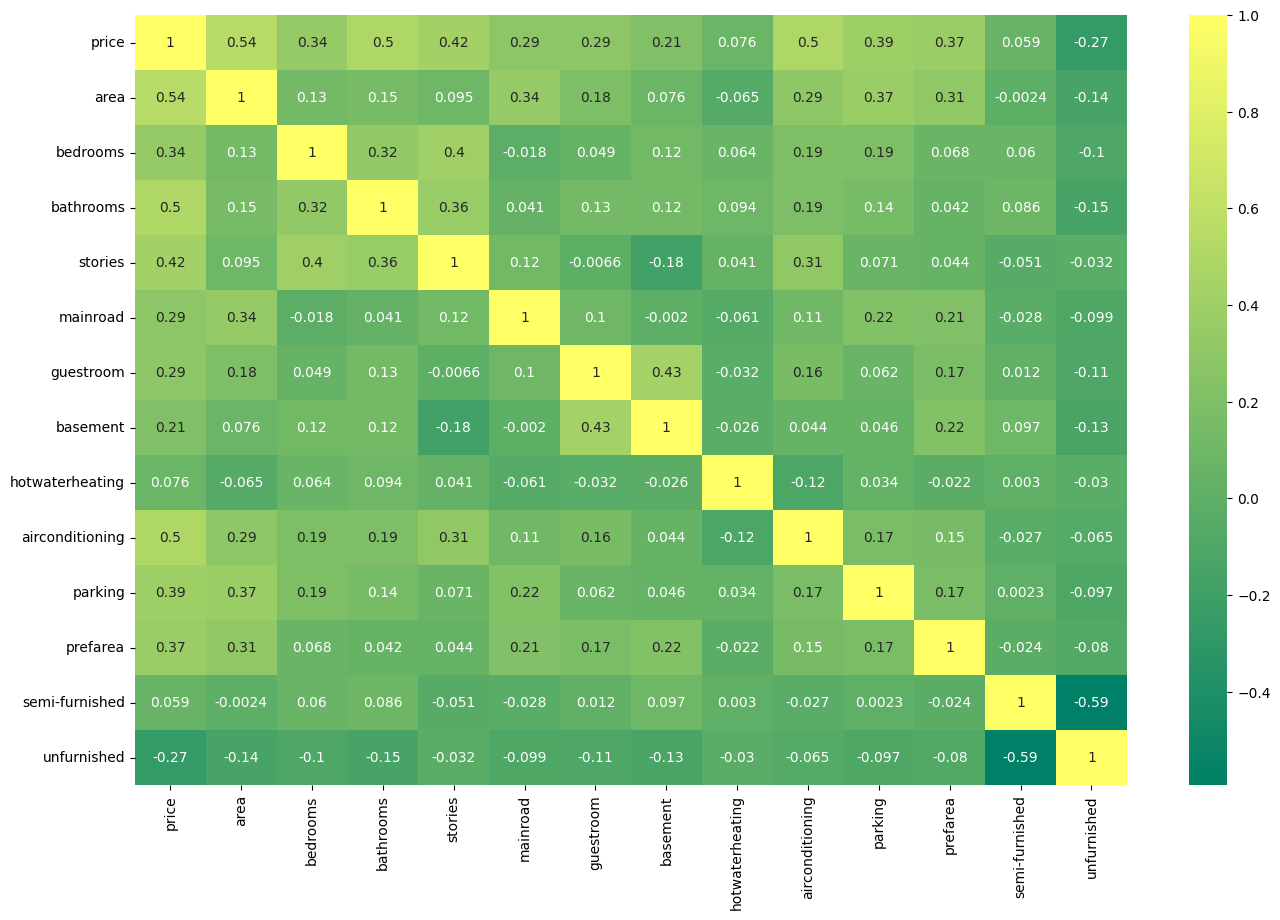

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="summer")
plt.show()

# Model Building

In [23]:
y_train = df_train.pop('price')
X_train = df_train

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.feature_selection import RFE

In [27]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 7),
 ('guestroom', False, 5),
 ('basement', False, 3),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 4)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [31]:
X_train_rfe = X_train[col]

In [32]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [34]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     113.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           7.97e-81
Time:                        19:24:17   Log-Likelihood:                 354.78
No. Observations:                 381   AIC:                            -695.6
Df Residuals:                     374   BIC:                            -668.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0620      0.010     

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.36
1,area,1.33
3,stories,1.24
4,airconditioning,1.21
2,bathrooms,1.18
5,parking,1.18
6,prefarea,1.12


# Residual Analysis of the train data

In [37]:
y_train_price = lm.predict(X_train_rfe)

In [38]:
res = (y_train_price - y_train)

# Showing Plottinng

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

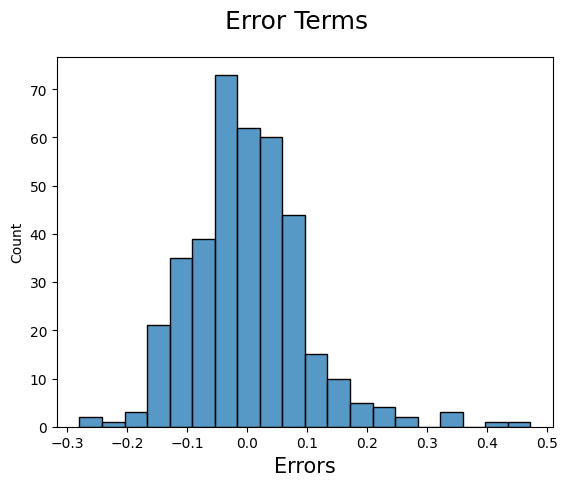

In [40]:
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                
plt.xlabel('Errors', fontsize = 15)  

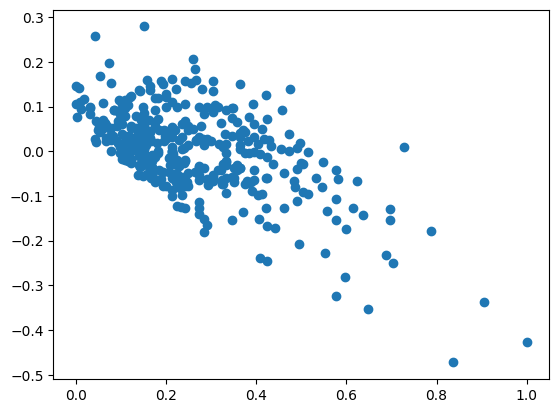

In [41]:
plt.scatter(y_train,res)
plt.show()

# Model Evaluation

In [42]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [43]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [44]:
y_test = df_test.pop('price')
X_test = df_test

In [45]:
X_test = sm.add_constant(X_test)

In [46]:
X_test_rfe = X_test[X_train_rfe.columns]

In [47]:
y_pred = lm.predict(X_test_rfe)

In [48]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5252755858924179

Text(0, 0.5, 'y_pred')

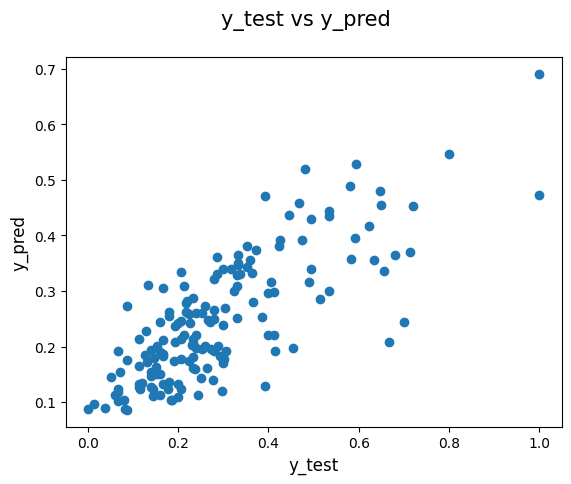

In [49]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)              
plt.xlabel('y_test', fontsize=12)                          
plt.ylabel('y_pred', fontsize=12)